### Introduction

The goal is to transfer data from a PostgreSQL database to a Neo4j database and then use Neo4j’s Cypher query language to extract specific elements of this data for the detailed analysis and insights.  
To meet this requirement the Chinook database tables have been converted into CSV files and uploaded to GitHub.  
In Neo4j, these CSVs are used to create nodes for entities like artists, albums, and tracks.  
Relationships are then established between these nodes—artists to albums, albums to tracks, and so on using Cypher queries.     This process enriches the graph database, enabling complex queries and analysis while maintaining the relational integrity of the original data.

### PostgreSQL to Neo4j Migration

#### Formatting the tables into CSV files

We are tasked with building a comprehensive Neo4j database by utilizing the data from the Artist, Album, Track, Genre, and MediaType tables present in PostgreSQL Chinook database. We export these tables from PostGres Chinook database to CSV format using COPY command and upload the exported CSV files to github repository.

The **COPY** command takes all records from the  table in the database, formats them as a CSV file with each column value separated by commas, includes the column headers as the first row of the file, and then writes this data to name.csv located in the F:\Chinook\ directory.

##### Formatting the Album table into Album.csv file 

COPY "Artist" TO 'F:\Chinook\Artist.csv' DELIMITER ',' CSV HEADER;

##### Formatting the Album table into Album.csv file 

COPY "Album" TO 'F:\Chinook\Album.csv' DELIMITER ',' CSV HEADER;

##### Formatting the Genre table into Genre.csv file 

COPY "Genre" TO 'F:\Chinook\Genre.csv' DELIMITER ',' CSV HEADER;

##### Formatting the Media Type table into MediaType.csv file 

COPY "MediaType" TO 'F:\Chinook\MediaType.csv' DELIMITER ',' CSV HEADER;

##### Formatting the Track table into Track.csv file 

COPY "Track" TO 'F:\Chinook\Track.csv' DELIMITER ',' CSV HEADER;

### Creating Neo4j schema

Our objective is to develop Neo4j schema by creating nodes from these datasets and construct the graphs with meaningful relationships that reflect the inherent connections between various musical entities, thereby enhancing the informational value and usability of the database.  
The approach involves creating distinct nodes for each entity type—Artists, Albums, Tracks, Genres, and MediaTypes—based on the attributes provided in the respective CSV files. To achieve a graph structure that mirrors real-world relationships and ensures data cohesion, we will establish specific types of relationships between these nodes:

* Making Relationship from **Artist** to **Album**(Artist Composes the Album)
* From **Album** to **Track**(Album contains the tracks)
* From **Track** to **Genre**(Different tracks belongs to various genres)
* From **Track** to **MediaType**(Specifying the track media type like Audio or video etc.).  

These relationships are critical in maintaining the referential integrity of the database and creating a graph that is both informative and meaningful. By mapping these connections, we ensure a structured and interconnected database that aids in the effective querying and analysis of musical data, enriching the user's navigational and exploratory experience in the digital music landscape.  
The schema includes the specification of any indexes or constraints that are required to maintain graph database performance and data integrity.

#### Creating Artist Node
The Artist node is created from Artist table of Chinook database using the exported Artist.csv file
We label the node as **Artist** and it includes the properties **ArtistId** and **Name**.

Load the CSV file Artist from github repository to Neo4j Browser using the **Cypher** command LOAD CSV WITH HEADERS.

##### Creating the Artist nodes using CYPHER Code in Neo4j. 

LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/NNikhil89/Neo4jFiles/main/Artist.csv' AS row 
MERGE (artist:Artist {ArtistId: toInteger(row.ArtistId) })  
 ON CREATE SET artist.Name = row.Name;

 ##### Visualising the Artist nodes 

MATCH (artist:Artist) RETURN artist LIMIT 10;

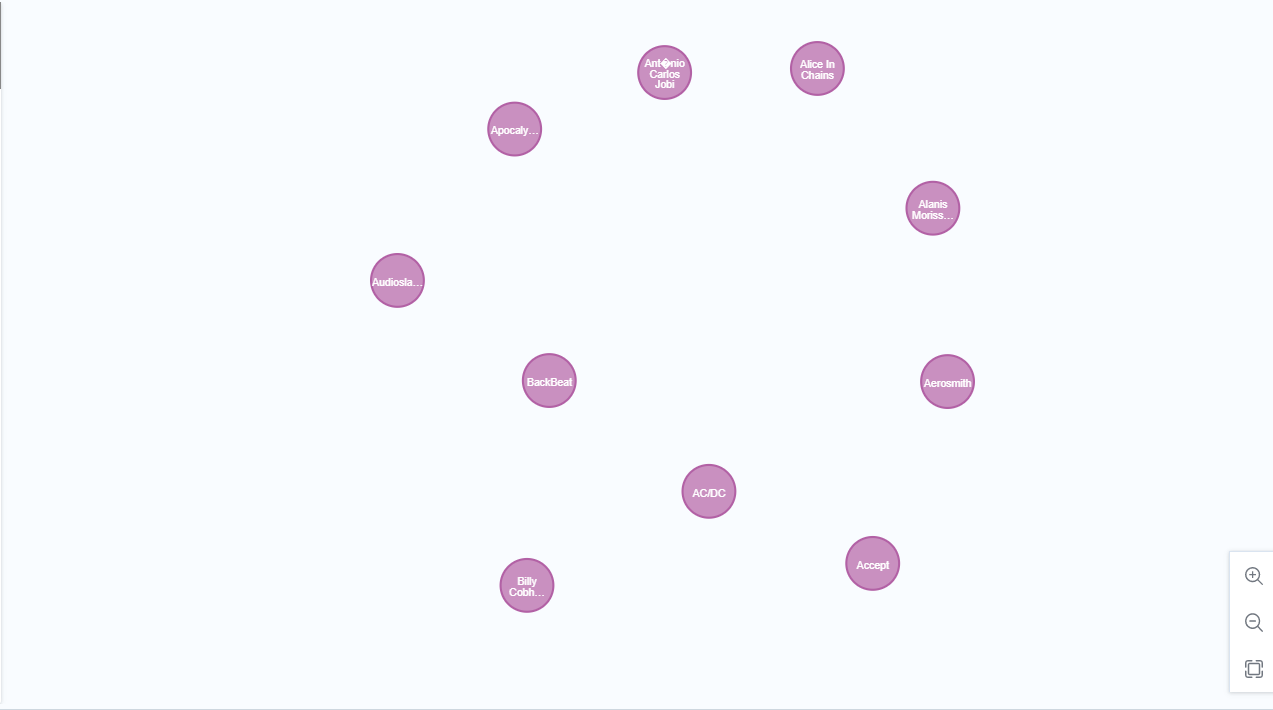

##### Indexes and constraints on Artist node
We create Index on ArtistId property which acts as Primary Key for the Artist Node and create **Not Null** constraint on the Name property using the below Cypher code

CREATE INDEX artist_id FOR (artist:Artist) ON (artist.ArtistId);  
CREATE CONSTRAINT artistname_notNull FOR (artist:Artist) REQUIRE artist.Name IS NOT NULL;  

#### Creating Album Node
The Album node is created from Album table of Chinook database using the exported Album.csv file
We label the node as **Album** and it includes the properties **AlbumId**, **Name** and **ArtistId**.

Load the CSV file Album from github repository to Neo4j Browser using the **Cypher** command LOAD CSV WITH HEADERS.

##### Creating the Album nodes using CYPHER Code in Neo4j.  

LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/NNikhil89/Neo4jFiles/main/Album.csv' AS row MERGE (album:Album {AlbumId: toInteger(row.AlbumId)}) ON CREATE SET album.Title = row.Title, album.ArtistId = toInteger(row.ArtistId)

 ##### Visualising the Album nodes 

MATCH (album:Album) RETURN album LIMIT 10;

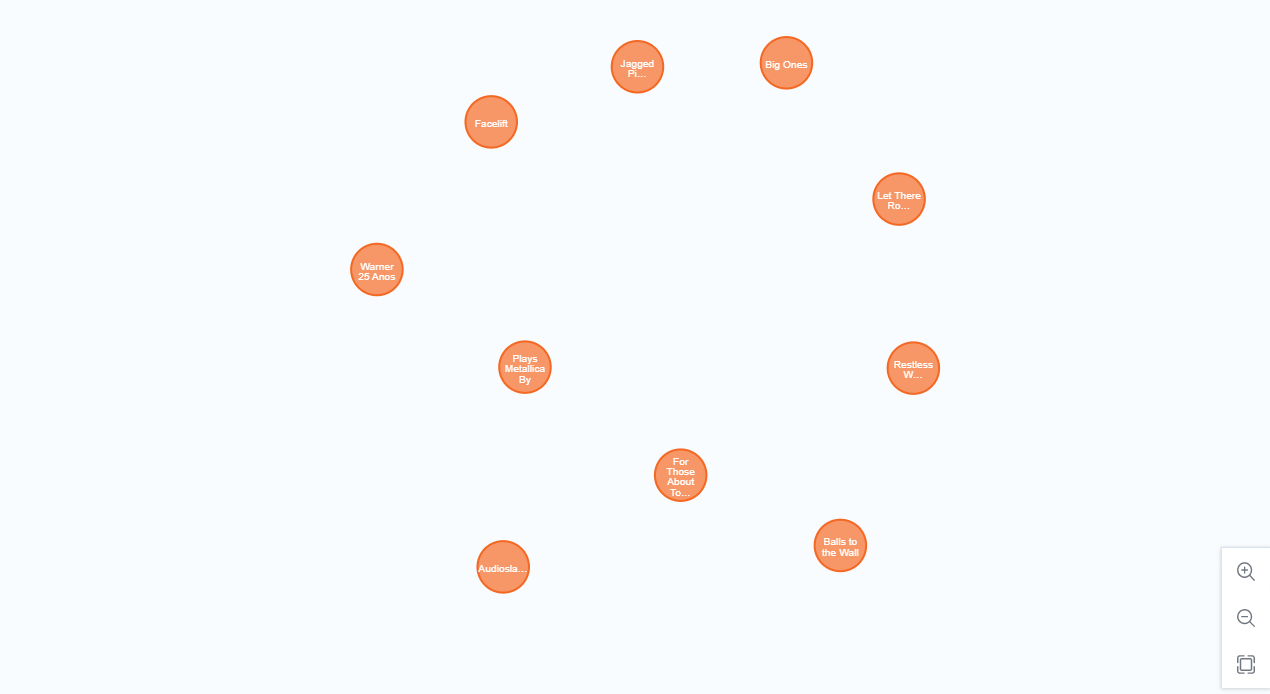

##### Indexes and constraints on Album node

We create Index on AlbumId property which acts as Primary Key for the Album Node and create **Not Null** constraints on the properties Title and ArtistId using the below Cypher code

CREATE INDEX album_id FOR (a:Album) ON (a.AlbumId);  
CREATE CONSTRAINT albumtitle_notNull FOR (a:Album) REQUIRE a.Title IS NOT NULL;  
CREATE CONSTRAINT artistId_notNull FOR (a:Album) REQUIRE a.ArtistId IS NOT NULL;  

#### Creating Track Node
The Track node is created from Track table of Chinook database using the exported Track.csv file
We label the node as **Track** and it includes the properties **TrackId**, **Name**, **AlbumId**, **GenreId**, **MediaTypeId**, **Composer** and **UnitPrice**.

##### Creating the Track nodes using CYPHER Code in Neo4j. 

LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/NNikhil89/Neo4jFiles/main/Track.csv' AS row MERGE (track:Track {TrackId: toInteger(row.TrackId)}) ON CREATE SET track.Name = row.Name, track.AlbumId= toInteger(row.AlbumId), track.GenreId= toInteger(row.GenreId), track.MediaTypeId= toInteger(row.MediaTypeId), track.Composer = row.Composer, track.UnitPrice = toFloat(row.UnitPrice)

###### Visualising the Track nodes 

MATCH (track:Track)
RETURN track LIMIT 10;

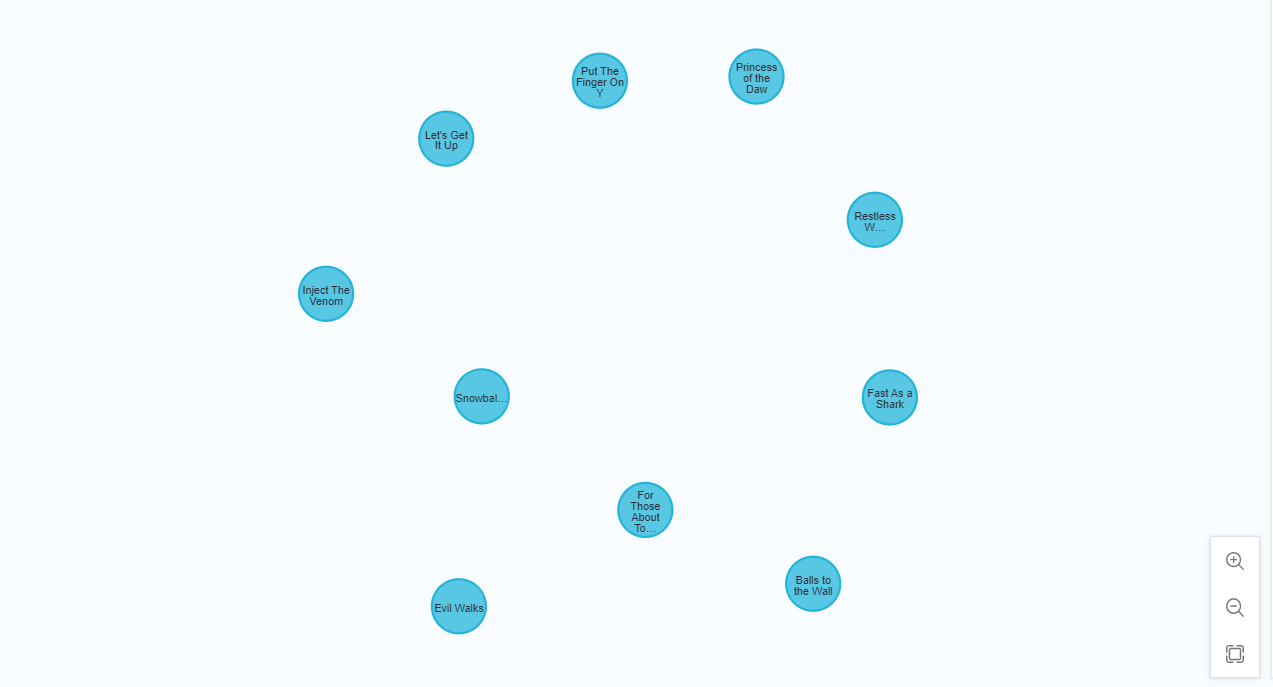

##### Indexes and constraints on Track node
We create Index on TrackId property which acts as Primary Key for the Track Node and create **Not Null** constraints on the properties Name, AlbumId, GenreId, MediaTypeId and UnitPrice using the below Cypher code

CREATE INDEX track_id FOR (t:Track) ON (t.TrackId);  
CREATE CONSTRAINT albumId_notNull FOR (t:Track) REQUIRE t.AlbumId IS NOT NULL;  
CREATE CONSTRAINT genreId_notNull FOR (t:Track) REQUIRE t.GenreId IS NOT NULL;  
CREATE CONSTRAINT mediaTypeId_notNull FOR (t:Track) REQUIRE t.MediaTypeId IS NOT NULL;  
CREATE CONSTRAINT trackName_notNull FOR (t:Track) REQUIRE t.Name IS NOT NULL;  
CREATE CONSTRAINT unitPrice_notNull FOR (t:Track) REQUIRE t.UnitPrice IS NOT NULL;  



#### Creating Genre Node
The Genre node is created from Genre table of Chinook database using the exported Genre.csv file
We label the node as **Genre** and it includes the properties **GenreId** and **Name**.

##### Creating the Genre nodes using CYPHER Code in Neo4j. 

LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/NNikhil89/Neo4jFiles/main/Genre.csv' AS row MERGE (genre:Genre {GenreId: toInteger(row.GenreId)}) ON
CREATE SET genre.Name= row.Name

 ##### Visualising the Genre nodes 

MATCH (genre:Genre)
RETURN genre LIMIT 10;

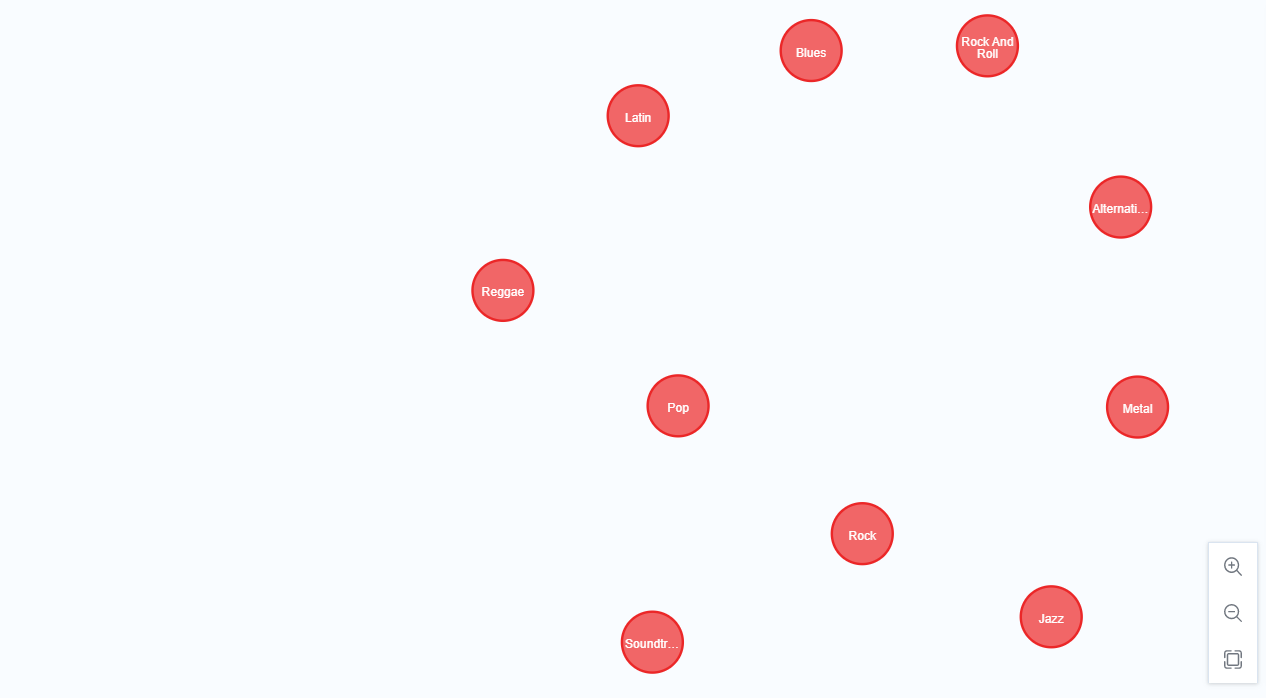

##### Indexes and constraints on Genre node
We create Index on GenreId property which acts as Primary Key for the Genre Node and create **Not Null** constraints on the Name property.

CREATE INDEX genre_id FOR (g:Genre) ON (g.GenreId);    
CREATE CONSTRAINT genreName_notNull FOR (g:Genre) REQUIRE g.Name IS NOT NULL; 

#### Creating MediaType Node

The MediaType node is created from MediaType table of Chinook database using the exported MediaType.csv file
We label the node as **MediaType** and it includes the properties **MediaTypeId** and **Name**.
##### Creating the MediaType nodes using CYPHER Code in Neo4j. 

LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/NNikhil89/Neo4jFiles/main/MediaType.csv' AS row MERGE (mediaType:MediaType {MediaTypeId: toInteger(row.MediaTypeId)}) ON CREATE SET mediaType.Name=row.Name

 ##### Visualising the nodes 

MATCH (mediaType:MediaType) RETURN mediaType LIMIT 10;

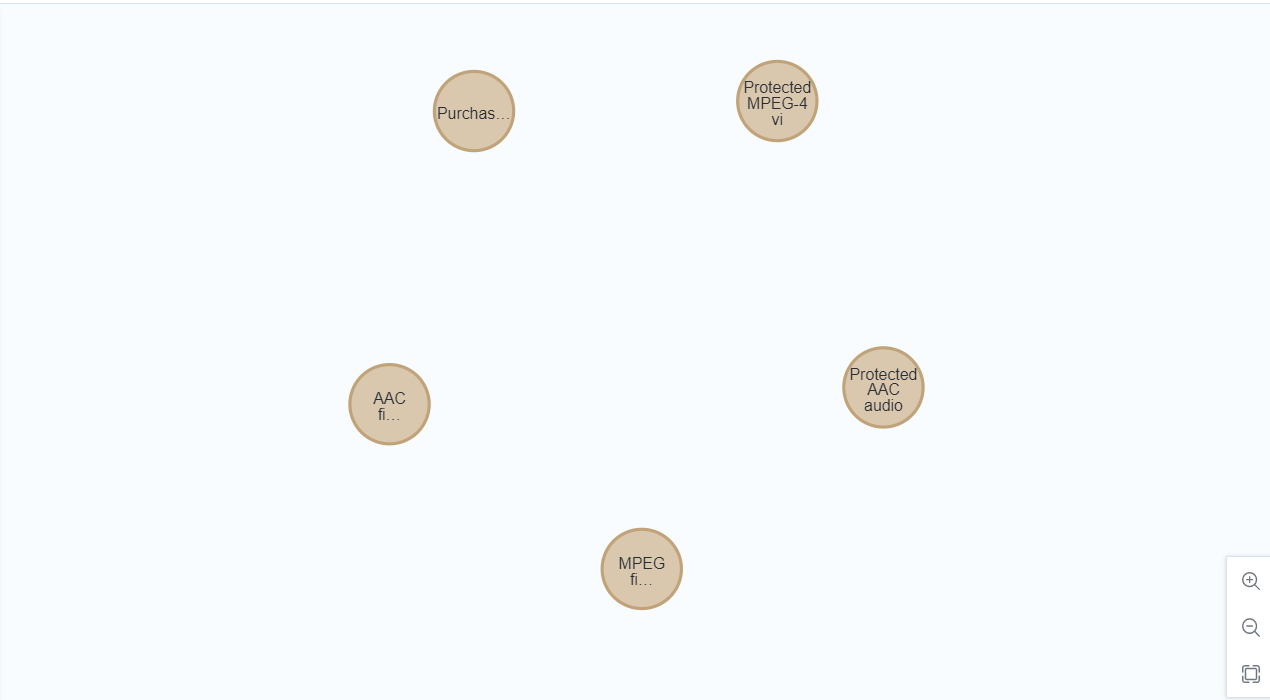

##### Indexes and constraints on MediaType node
We create Index on MediaTypeId property which acts as Primary Key for the MediaType Node.

CREATE INDEX mediaType_id FOR (m:MediaType) ON (m.MediaTypeId);    

### Establishing Relationships between Nodes

#### CREATED Relationship between Artist and Album
We establish **CREATED** Relationship between Artist and Album as Artist creates an Album.  
The direction of the  **CONTAINS** relationship is from Artist -> Album

MATCH (artist:Artist), (album:Album)
WHERE artist.ArtistId = album.ArtistId
MERGE (artist)-[:CREATED]->(album);

 ##### Visualising the CREATED Relationship

MATCH (artist:Artist)-[]-(album:Album)
RETURN artist,album LIMIT 10;

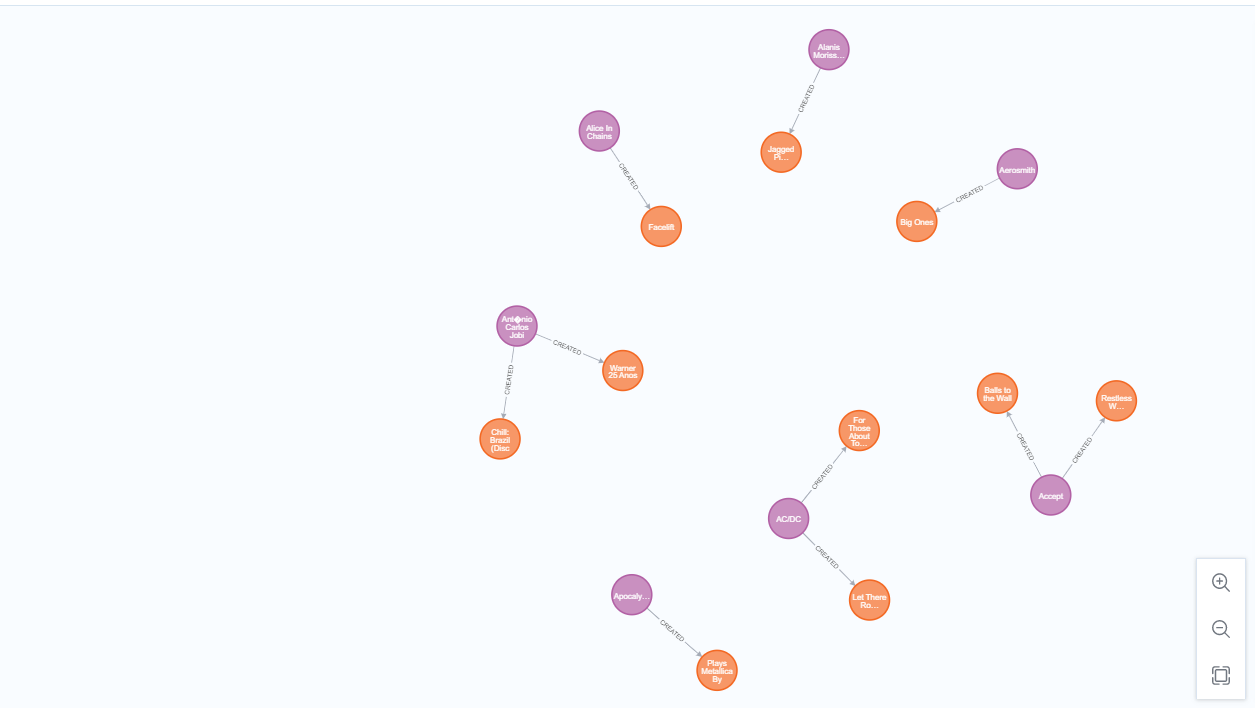

#### CONTAINS Relationship between Album and Track
We establish **CONTAINS** Relationship between Album and Track as an Album contains several Tracks.  
The direction of the  **CONTAINS** relationship is from Album -> Track.

MATCH (album:Album), (track:Track)
WHERE album.AlbumId = track.AlbumId
MERGE (album)-[at:CONTAINS]->(track);

 ##### Visualising the CONTAINS Relationship

MATCH (album:Album)-[]-(track:Track)
RETURN album,track LIMIT 10;;

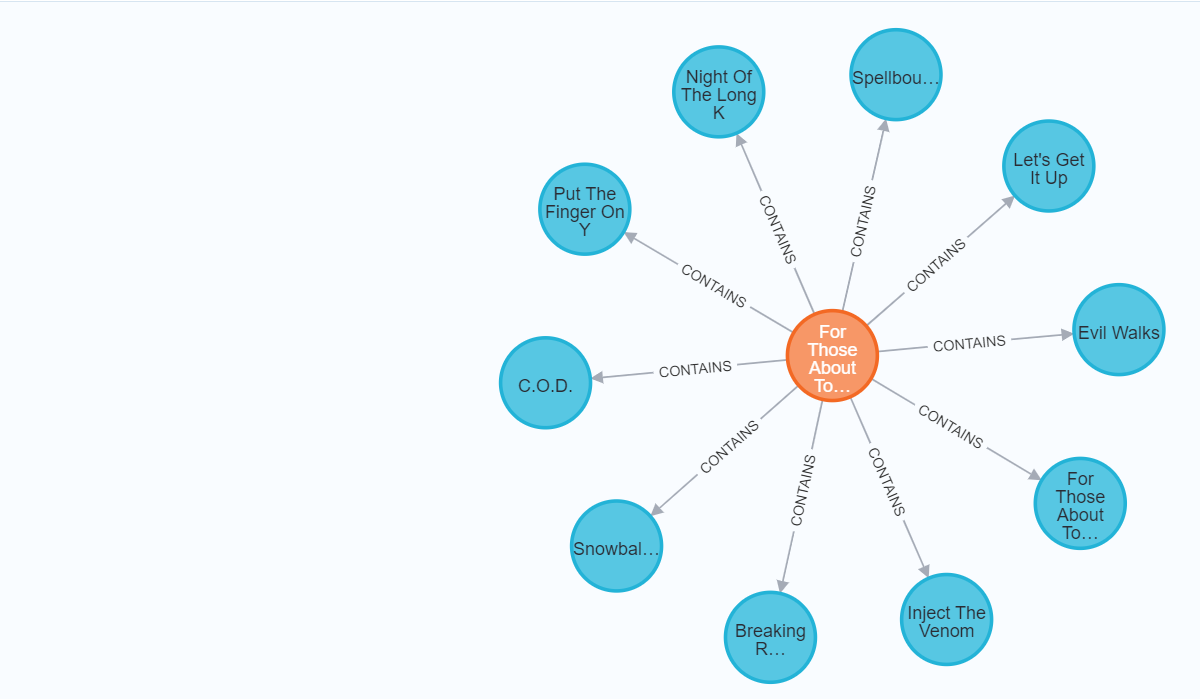

#### BELONGS_TO Relationship between Track and Genre
We establish **BELONGS_TO** Relationship between Track and Genre as each Track belongs to a specific Genre.  
The direction of the  **BELONGS_TO** relationship is from Track -> Genre

MATCH (track:Track), (genre:Genre)
WHERE track.GenreId = genre.GenreId
MERGE (track)-[tg:BELONGS_TO]->(genre);

##### Visualising the BELONGS_TO Relationship

MATCH (track:Track)-[tg:BELONGS_TO]->(genre:Genre)
RETURN track, genre LIMIT 10;

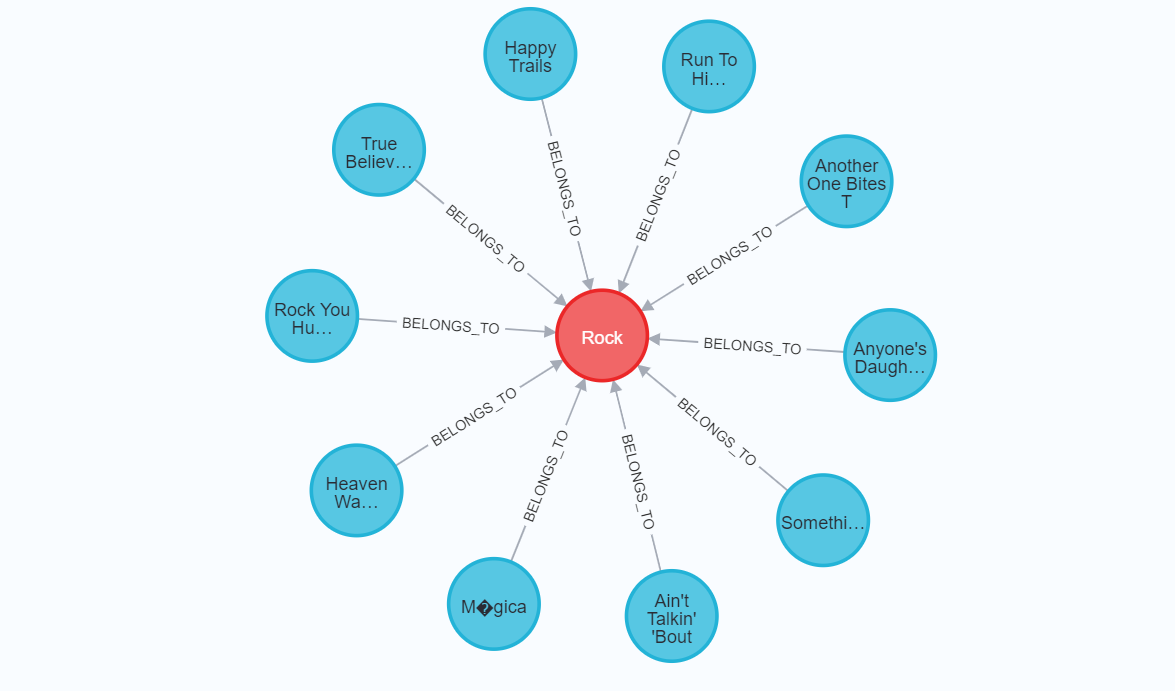

#### RECORDED_IN Relationship between Track and MediaType
We establish **RECORDED_IN** Relationship between Track and MediaType as each Track can be recorded in various audio or video modes.
The direction of the  **RECORDED_IN** relationship is from Track -> MediaType.

As the Track table contains the fields Milliseconds and Bytes which relates to the recorded audio type, we can establish these properties on the **RECORDED_IN** relationship using the below code

LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/NNikhil89/Neo4jFiles/main/Track.csv' AS row

MATCH (track:Track {MediaTypeId: toInteger(row.MediaTypeId)})
MATCH (mediaType:MediaType {MediaTypeId: toInteger(row.MediaTypeId)})

MERGE (track)-[ri:RECORDED_IN]->(mediaType)
ON CREATE SET
    ri.Milliseconds = toInteger(row.Milliseconds),
    ri.Bytes = toInteger(row.Bytes)



##### Visualising the RECORDED_IN Relationship
MATCH (track:Track)-[]-(mediaType:MediaType)
RETURN track,mediaType LIMIT 10;

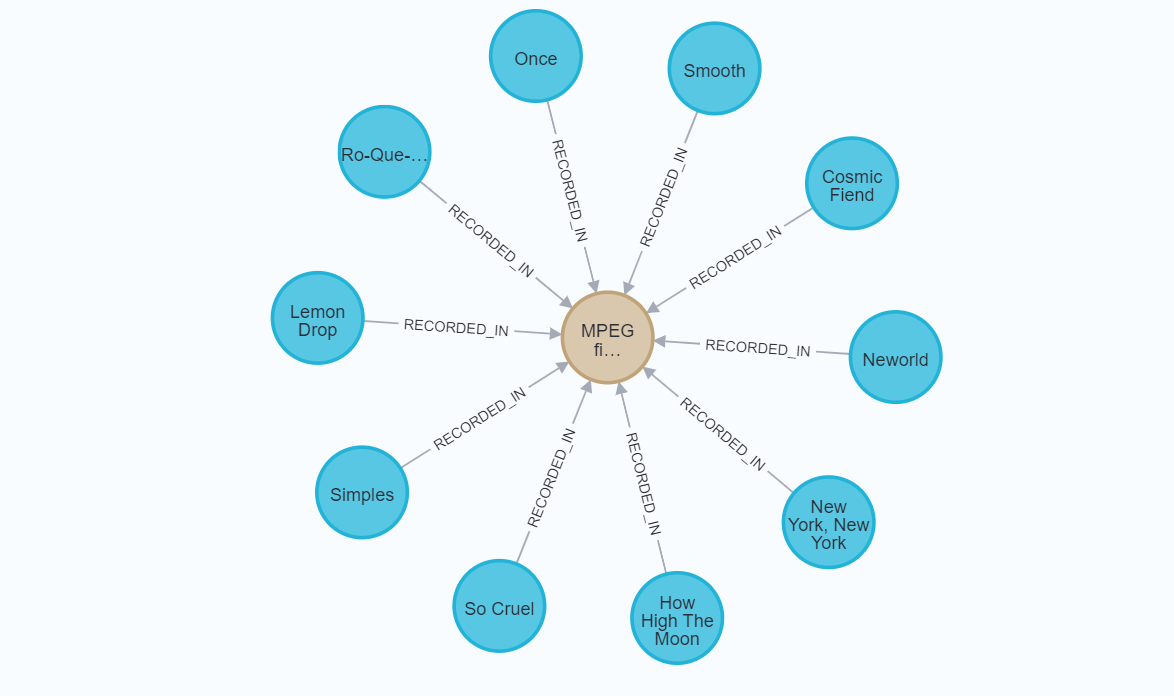

### Overall Neo4j Schema for Chinook database
The Neo4j schema for Chinook database with all the nodes and relationships looks as shown below

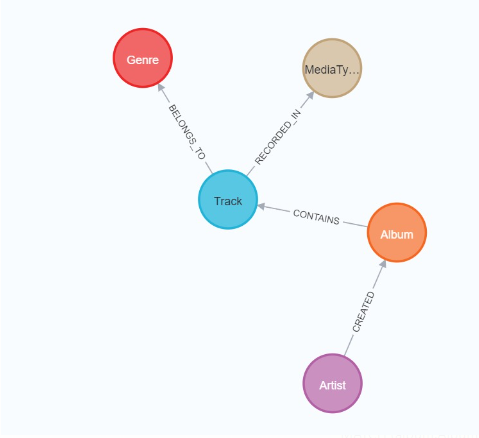

We successfully transfered data from a PostgreSQL database to a Neo4j database.
The schema visualization depicts a graph structure with nodes representing different entities: Genre, MediaType, Track, Album, and Artist, each connected by specific relationships. The query formulated targets albums linked to tracks without a listed composer. By traversing from Album to Track nodes, the query applies a filter to select only those tracks where the composer field is null. The result is a distinct list of such albums, sorted alphabetically, effectively identifying albums with at least one track of unknown authorship.

### Using Cypher to Retrieve Data from Neo4j

Executing a Cypher query that returns all Tracks from the ‘Jazz’ genre composed by ‘Miles Davis’ 

Retrieving and listing all track names composed by Miles Davis that are categorized under the Jazz genre using the below Cypher query

MATCH (track:Track{Composer:'Miles Davis'})-[belongs:BELONGS_TO]->(genre:Genre{Name: 'Jazz'}) return track.Name as TrackName order by TrackName

The above code Matches tracks by the composer 'Miles Davis' to the Jazz genre, then returns and sorts the track names alphabetically.


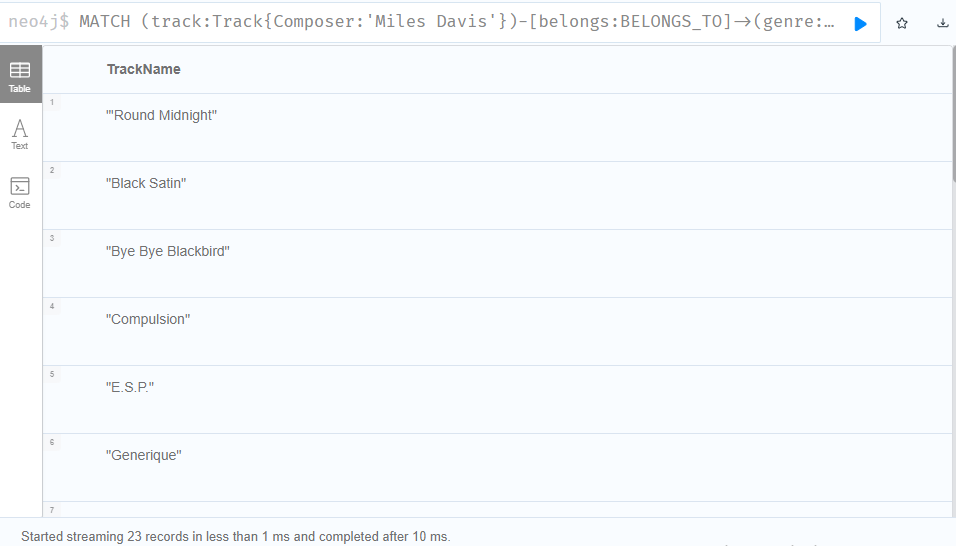

* We have a total of 23 tracks composed by Miles Davis that are categorized under the Jazz genre

#### Executing a Cypher query that returns all Artists that have any Tracks available in the ‘AAC audio file’ media type.

Cypher query for designing to find artists who have composed albums containing tracks specifically recorded in the 'AAC audio file' format.

MATCH (artist:Artist)-[:COMPOSED]-> (album:Album)-[contains:CONTAINS]->(track:Track)-[recorded:RECORDED_IN]->(mediaType:MediaType{Name: 'AAC audio file'}) return distinct artist.Name as ArtistName order by ArtistName

The query establishes a path starting from 'Artist' nodes, through a 'COMPOSED' relationship to 'Album' nodes.  
From these albums,  it follows a 'CONTAINS' relationship to 'Track' nodes, and then checks if these tracks are linked through a 'RECORDED_IN' relationship  to 'MediaType' nodes with the name 'AAC audio file'.  
The result is a list of distinct artist names sorted alphabetically under the alias ArtistName, identifying artists associated with AAC audio format tracks

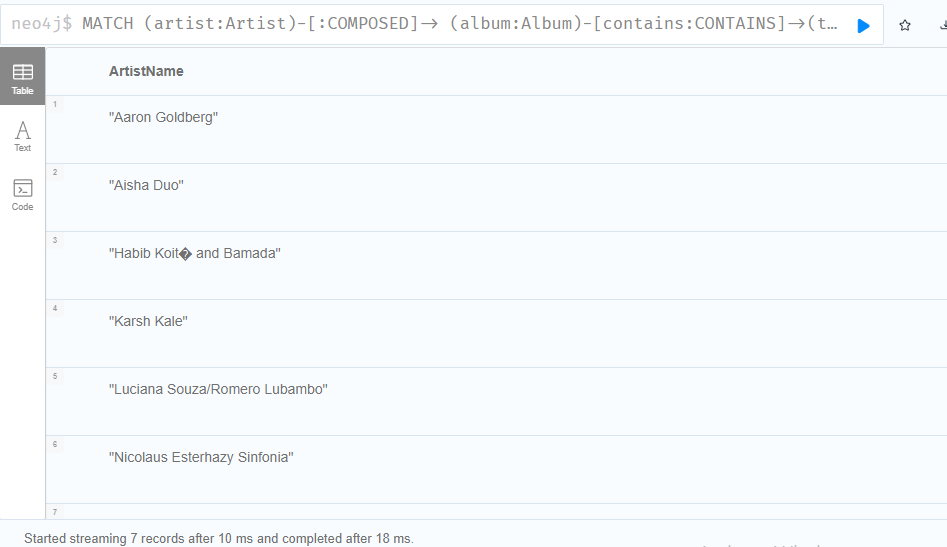


There are total of 7 artists who have composed albums containing tracks specifically recorded in the 'AAC audio file' format

#### Executing a Cypher query that returns the Artist associated with the album ‘Bongo Fury’.

Cypher query for retrieving the names of artists who composed the album titled "Bongo Fury

MATCH (artist:Artist)-[:COMPOSED]-> (album:Album{Title:'Bongo Fury'}) return artist.Name
 
The above query starts by matching any 'Artist' node that is linked through a 'COMPOSED' relationship to an 'Album' node specifically titled 'Bongo Fury'.  
The query returns the name of each artist involved in the composition of this album, providing insights into the contributors to "Bongo Fury".

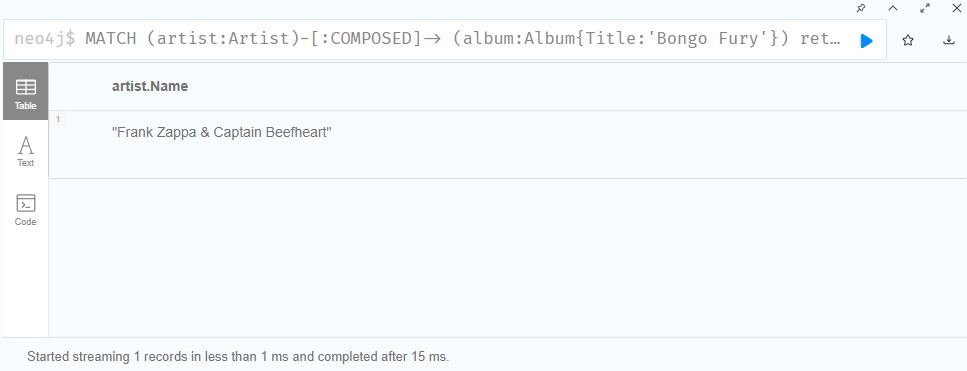

* The above result shows there is only one artist who composed the album titled "Bongo Fury

#### Cypher query that returns all Tracks from the album ‘Coda’ by the artist ‘Led Zeppelin’.

Cypher query for retrieving the names of all tracks from the album titled "Coda" that was composed by the artist "Led Zeppelin".

MATCH (artist:Artist{Name:'Led Zeppelin'})-[:COMPOSED]-> (album:Album{Title:'Coda'})-[contains:CONTAINS]->(track) return track.Name as TrackName order by TrackName 

The above query identifies nodes labeled as 'Artist' with the name 'Led Zeppelin' and connects these via a ‘ Composed’ relationship to 'Album' nodes with the title 'Coda'.  
It further follows the 'CONTAINS' relationship from the album to its associated track nodes.  
The result returns the names of these tracks, referred to as TrackName, and sorts them in alphabetical order.

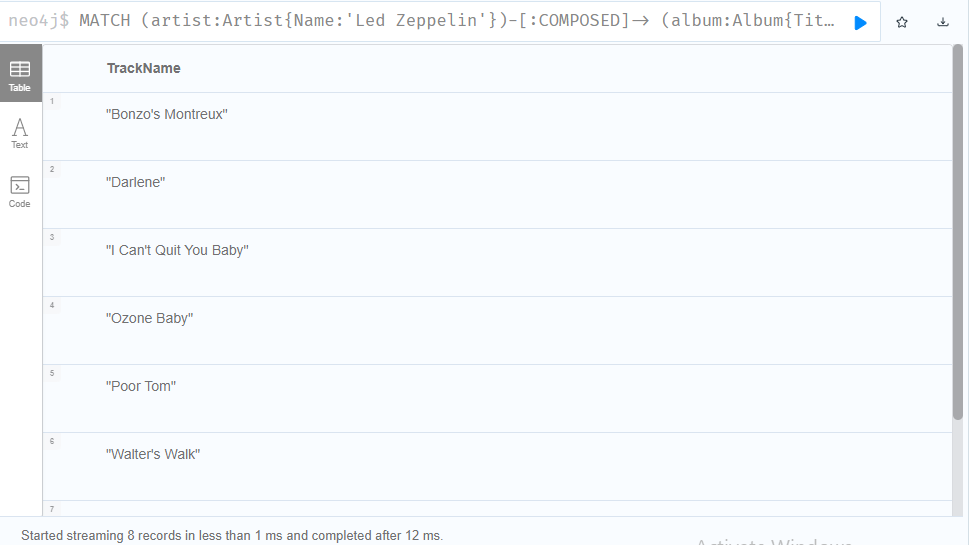


* The above result shows 8 tracks from the album titled "Coda" that was composed by the artist "Led Zeppelin"

Cypher query that returns all Albums that contain Tracks composed by ‘Alanis
Morissette & Glenn Ballard’

MATCH (album:Album)-[contains:CONTAINS]->(track:Track{Composer:'Alanis Morissette & Glenn Ballard'})   return distinct album.Title as AlbumName order by AlbumName

The above code by matches 'Album' nodes linked through a 'CONTAINS' relationship to 'Track' nodes where the 'Composer' property  is set to 'Alanis Morissette & Glenn Ballard'.  The query returns a list of unique album titles, referred to as AlbumName, and sorts them alphabetically. 


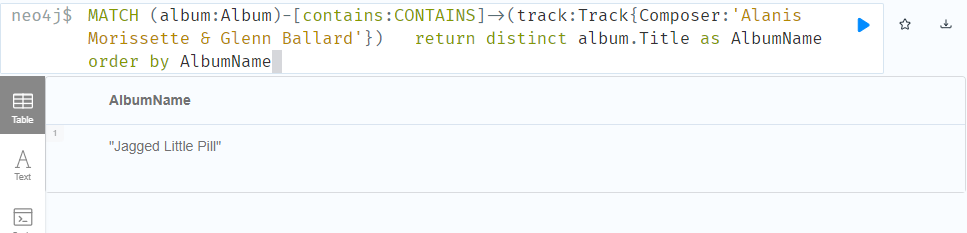


* The above output indicates there is only one album albums that contain tracks composed by both Alanis Morissette and Glenn Ballard

f) Write and execute a Cypher query that returns the names of all Albums containing Tracks for which
no Composer has been specifie

Cypher query searches for albums containing tracks with no specified composer.

MATCH (album:Album)-[contains:CONTAINS]->(track:Track) where track.Composer is null return distinct album.Title as AlbumName order by AlbumName

The above query starts by matching 'Album' nodes connected through a 'CONTAINS' relationship to 'Track' nodes.  A condition is applied to filter out only those tracks where the 'Composer' attribute is null, indicating these tracks do not have an associated composer. The query returns a list of unique album titles, referred to as AlbumName, and organizes them in alphabetical order.

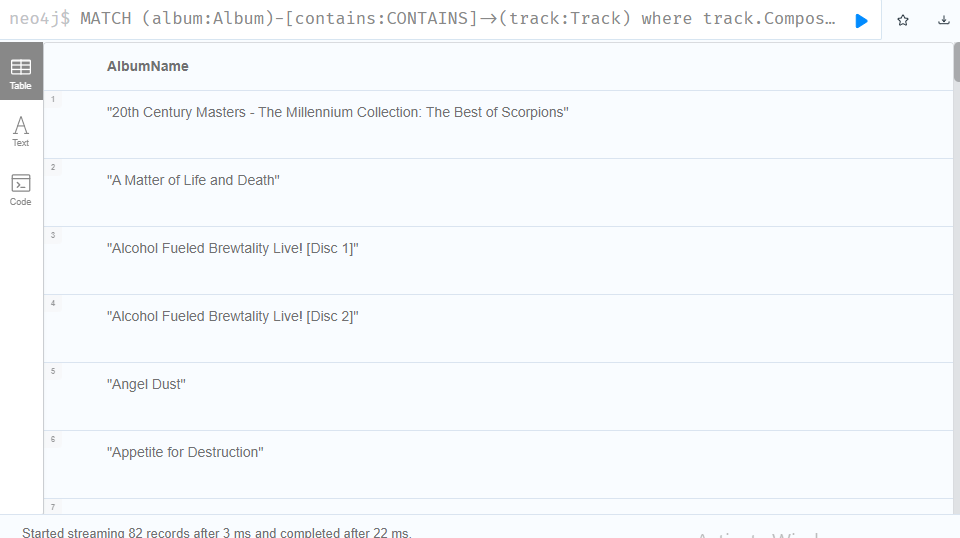

* There are total of 82 album tracks who doesnot have a composer